In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("co2_daily.csv")
df

,년,월,일,데이터
0,1974,5,17,333.38
1,1974,5,18,333.11
2,1974,5,19,333.46
3,1974,5,20,333.64
4,1974,5,21,333.50
...,...,...,...,...
15296,2024,3,7,425.36
15297,2024,3,8,426.10
15298,2024,3,9,425.54
15299,2024,3,10,425.10


In [13]:
def make_dataset(X, y, T):
    df = pd.DataFrame(X, columns=["X"])

    df["X2"] = X**2
    df["X3"] = X**3
    df["cosX"] = np.cos(2 * np.pi * X / T)
    df["sinX"] = np.sin(2 * np.pi * X / T)
    df["cos2X"] = np.cos(2 * np.pi * 2 * X / T)
    df["sin2X"] = np.sin(2 * np.pi * 2 * X / T)

    df["y"] = y

    return df

In [14]:
df_index = make_dataset(np.arange(0, len(df)), df["데이터"], T=365.25)

In [15]:
df_index.head()

,X,X2,X3,cosX,sinX,cos2X,sin2X,y
0,0,0,0,1.000000,0.000000,1.000000,0.000000,333.38
1,1,1,1,0.999852,0.017202,0.999408,0.034398,333.11
2,2,4,8,0.999408,0.034398,0.997634,0.068755,333.46
3,3,9,27,0.998669,0.051584,0.994678,0.103031,333.64
4,4,16,64,0.997634,0.068755,0.990545,0.137185,333.50


In [16]:
from sklearn.linear_model import LinearRegression

Xs = ["X", "X2", "X3", "cosX", "sinX", "cos2X", "sin2X"]

lr = LinearRegression().fit(df_index[Xs], df_index["y"])

prd_idx = lr.predict(df_index[Xs])

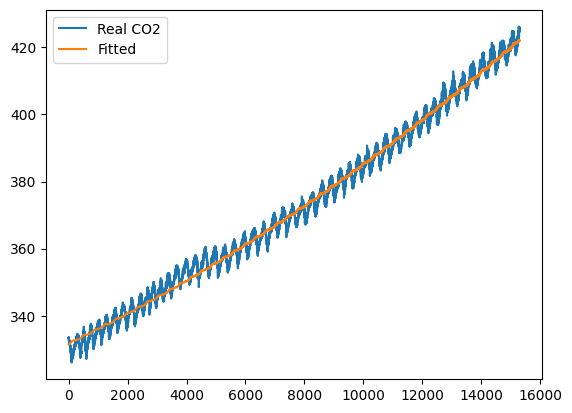

In [17]:
plt.plot(df_index["X"], df_index["y"], label="Real CO2")
plt.plot(df_index["X"], prd_idx, label="Fitted")
plt.legend()
plt.show()

In [18]:
def datetime_to_float(d):
    start_of_year = pd.Timestamp(year=d.year, month=1, day=1)
    end_of_year = pd.Timestamp(year=d.year + 1, month=1, day=1) - pd.Timedelta(days=1)

    total_days = (end_of_year - start_of_year).days + 1
    elapsed_days = (d - start_of_year).days

    return d.year + elapsed_days / total_days

In [19]:
df['X'] = pd.to_datetime(df['년'].astype(str) + '-' + df['월'].astype(str) + '-' + df['일'].astype(str)).apply(datetime_to_float)

In [20]:
from sklearn.linear_model import LinearRegression

df_time = make_dataset(df["X"], df["데이터"], T=1)

lr = LinearRegression().fit(df_time[Xs], df_time["y"])

In [21]:
prd = lr.predict(df_time[Xs])

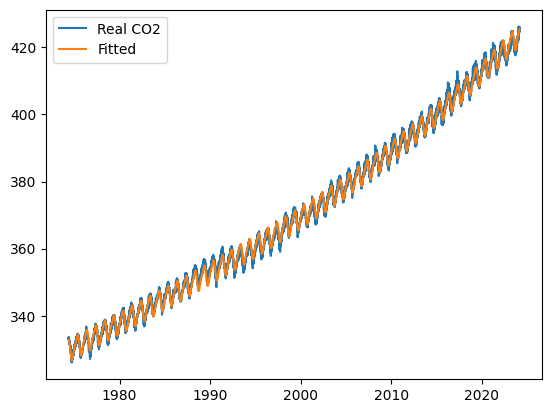

In [22]:
plt.plot(df_time["X"], df_time["y"], label="Real CO2")
plt.plot(df_time["X"], prd, label="Fitted")
plt.legend()
plt.show()

In [26]:
prd_times = pd.Series(pd.date_range(start='2024-3-12', end='2030-12-31', freq='D')).apply(datetime_to_float)

In [27]:
df_prd = make_dataset(prd_times, 0, T=1)

prd = lr.predict(df_prd[Xs])

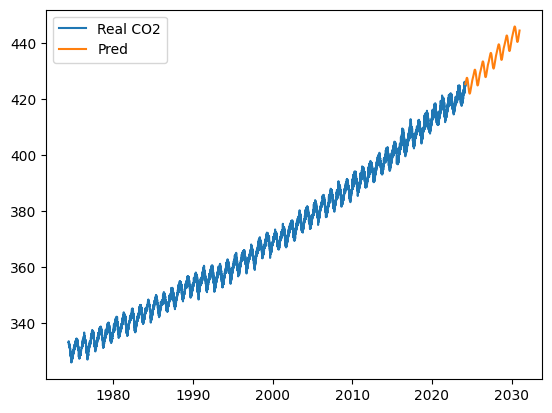

In [28]:
plt.plot(df_time["X"], df_time["y"], label="Real CO2")
plt.plot(df_prd["X"], prd, label="Pred")
plt.legend()
plt.show()